# Image Processing Assessment

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_img(img, cmap=None):
    fig = plt.figure(figsize=(12,10)) # width, height in inches
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

## TASK #1: Open and dispay giraffes.jpg

<class 'numpy.ndarray'>


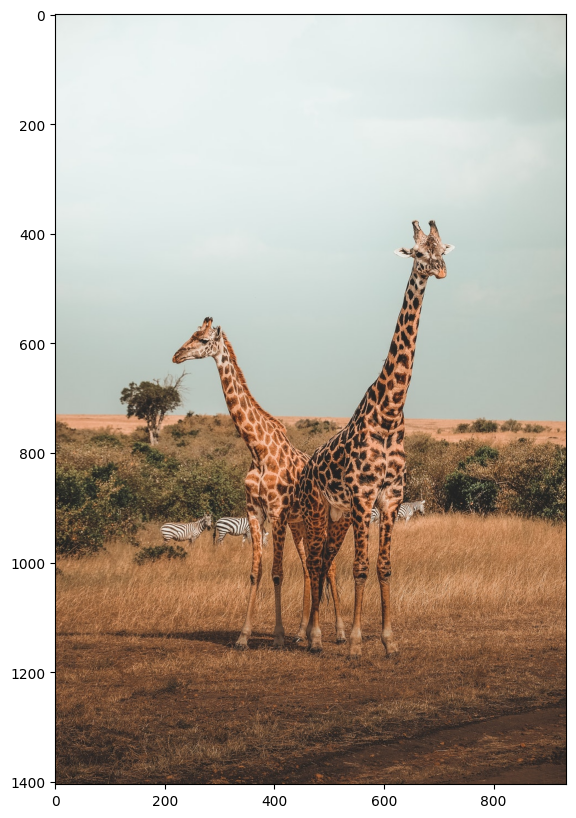

In [3]:
giraffes = cv2.imread('data/giraffes.jpg')
print(type(giraffes)) # check if image loading was successful
# plt.imshow(giraffes)
show_giraffes = cv2.cvtColor(giraffes, cv2.COLOR_BGR2RGB) # OpenCV loaded image in BGR space but matplotlib requires RGB
# plt.imshow(show_giraffes)
# display_img(show_giraffes)
display_img(show_giraffes)

## TASK #2: Apply a binary threshold onto the image

threshold_value = 127


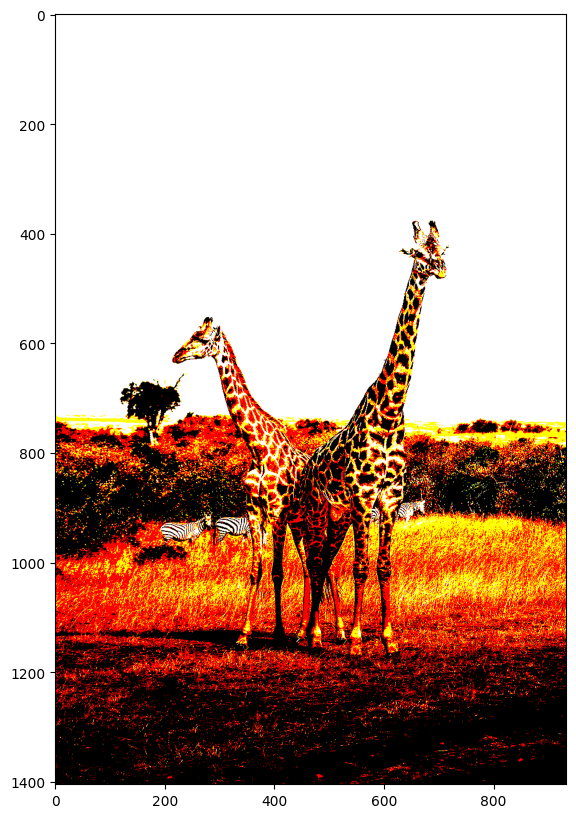

In [4]:
# We can apply a binary threshold on the original (BGR) image; it will be applied for each channel

# we'll choose a middlepoint value for threshold
threshold_value = show_giraffes.max() // 2 # floor division to get the whole integer
print(f'threshold_value = {threshold_value}')
ret, thresh0 = cv2.threshold(show_giraffes, threshold_value, 255, cv2.THRESH_BINARY)
display_img(thresh0)

threshold_value = 127
127.0


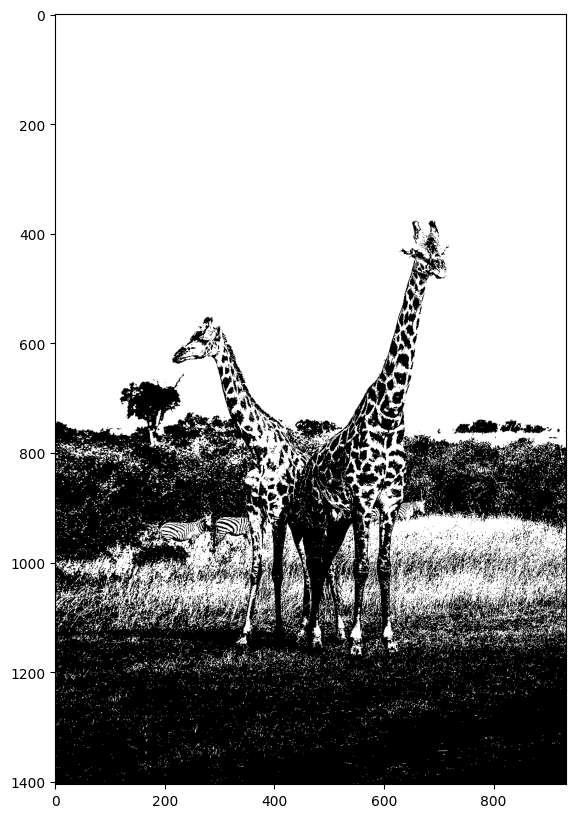

In [6]:
# To get a binary image, we want to do thresholding on a grayscale image:
giraffes_grayscale = cv2.imread('data/giraffes.jpg', flags=cv2.IMREAD_GRAYSCALE)

# we'll choose a middlepoint value for threshold
threshold_value = giraffes_grayscale.max() // 2 # floor division to get the whole integer
print(f'threshold_value = {threshold_value}')

# THRESH_BINARY: every value below threshold should turn into 0 (black) and every value above the threshold should turn to maxval (white)
ret, thresh1 = cv2.threshold(giraffes_grayscale, threshold_value, 255, cv2.THRESH_BINARY)
print(ret)
display_img(thresh1, cmap='gray')

## TASK #3: Open giraffes.jpg file again and convert its colour space to HSV and display the image

In [ ]:
giraffes = cv2.imread('data/giraffes.jpg')
print(type(giraffes)) # check if image loading was successful
# plt.imshow(giraffes)
show_giraffes = cv2.cvtColor(giraffes, cv2.COLOR_BGR2HSV) # OpenCV loaded image in BGR space but matplotlib requires RGB
# plt.imshow(show_giraffes)
# display_img(show_giraffes)
display_img(show_giraffes)

## TASK #4: Create a low-pass filter with a 4x4 kernel filled with values of 1/10 (0.1) and then use 2D convolution to blur the giraffe image (displayed in normal RGB).

In [ ]:
# This also works:
# giraffes = cv2.imread('../data/giraffes.jpg').astype(np.float32) / 255 # image depth: numpy.float32

giraffes = cv2.imread('../data/giraffes.jpg') # image depth: numpy.uint8
giraffes = cv2.cvtColor(giraffes, cv2.COLOR_BGR2RGB)
type(giraffes[0,0,0])

In [ ]:
kernel = np.ones((4,4), dtype=np.float32) / 10 # kernel has to have the same type as the image
kernel

In [ ]:
# -1 is destination depth (data type e.g. unsigned short, int...used to represent fundamental color intensity); -1 means that it should be the same as in the input image 
dst = cv2.filter2D(giraffes, -1, kernel)

# the output will look a bit blurred
display_img(dst)

## TASK 5: Create a horisontal Sobel filter (sobelx) with kernel size of 5 to the grayscale version of the giraffes image and then display the resulting gradient filtered version of the image.

In [ ]:
# let's check that giraffes_grayscale is indeed loaded as grayscale (it should be only 2-D matrix as it has only a single colour channel - for grayscale)
giraffes_grayscale.shape

In [ ]:
display_img(giraffes_grayscale, cmap='gray')


In [ ]:
sobelx = cv2.Sobel(giraffes_grayscale, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
display_img(sobelx, cmap='gray')

# TASK #6: Plot the color histograms for the RED, BLUE and GREEN channel of the giraffe image. Pay careful attention to the ordering of channels.

In [ ]:
giraffes = cv2.imread('../data/giraffes.jpg')
show_giraffes = cv2.cvtColor(giraffes, cv2.COLOR_BGR2RGB)
display_img(show_giraffes)

In [ ]:
def show_histogram(img, title, xmax, ymax=None): 
    color = ('b', 'g', 'r')
    for i, clr in enumerate(color):
        histr = hist_values = cv2.calcHist([img], channels=[i], mask=None, histSize=[256], ranges=[0, 256])
        plt.plot(histr, color = clr)
        plt.xlim([0, xmax])
        if ymax != None:
            plt.ylim([0, ymax])
    plt.title(title)

show_histogram(giraffes,'HISTOGRAM FOR giraffes.jpg', 256)